(sec:integrable-singularities)=
# Improper Integrals II:  Integrable Singularities

If the integrand has integrable singularities such as $\displaystyle\frac{1}{\sqrt{x}}$ within the integral interval, standard methods fail. Such improper integrals are ubiquitous in physics.  A common method is to isolate the singularity and integrate it analytically.  Then, we integrate the remaining part by a numerical method.  

Consider an improper integral

$$
\int_0^1 \frac{1}{(1+x)\sqrt{x}} dx = \frac{\pi}{2}
$$(eq:int-singularity)

This integral is finite despite that the integrand diverges at $x=0$. In order to find the type of singularity, Let us look at the integrand near $x=0$. Using the positive infinitesimal $\epsilon$, the integrand can be expanded as

$$
\frac{1}{(1+\epsilon)\sqrt{\epsilon}} \sim \frac{1-\epsilon}{\sqrt{\epsilon}} = \frac{1}{\sqrt{\epsilon}}- \sqrt{\epsilon}
$$

Hence, the singularity is $\displaystyle\frac{1}{\sqrt{\epsilon}}$ which we can integrate analytically. By subtracting the singularity from the integral, we obtain a regular integral:

$$
\int_0^1 \left [ \frac{1}{(1+x)\sqrt{x}}
 - \frac{1}{\sqrt{x}} \right ] dx  = - \int_0^1 \frac{\sqrt{x}}{1+x} dx = \frac{\pi}{2} - 2
$$(eq:int-no-singularity)

Note that the new integrand has no singularity and thus can be integrated by a standard method.   To get the opriginal integral, we just add back

$$
\int_0^1 \frac{1}{\sqrt{x}} dx = 2
$$

and obtain $\frac{\pi}{2}$.   As an exercise, we numerically carry out the above procedure.  First, we plot the integrand before and after the singularity is removed.

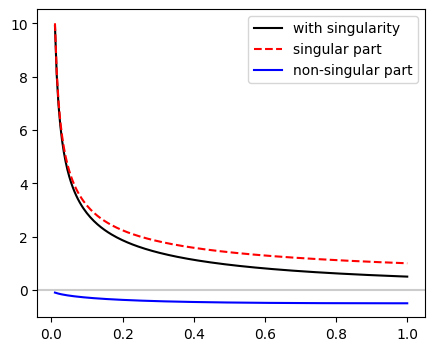

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=200

# evaluation points. x=0 is excluded.
x=np.linspace(0.01,1,N)

f0=1/np.sqrt(x)
f1=1/(1+x)/np.sqrt(x)
f2=f1-f0

plt.figure(figsize=(5,4))
plt.plot(x,f1,'-k',label="with singularity")
plt.plot(x,f0,'--r',label="singular part")
plt.plot(x,f2,'-b',label="non-singular part")
plt.axhline(y = 0, color = '0.8', linestyle = '-')
plt.legend(loc=1)
plt.show()

The black line shows the original integrand  {eq}`eq:int-singularity` and the red dashed line is the singular part.  The two curves coincide near the singularity.  The difference between them (the blue line) is finite and smooth, can be numerically integrated by a piecewise integration method.

Next we evaluate the integral.   The singular part is analytically integrated and added to the numerical integration of the non-singular part.

In [2]:
import numpy as np
from scipy.integrate import simpson

N=201

# x is included
x=np.linspace(0,1,N)

# x=0 is temporarily removed
x[0]=1

y=1/(1+x)/np.sqrt(x) - 1/np.sqrt(x)

# evaluate the integrand at x=0
x[0]=0
y[0]=0

s = simpson(y,x=x)


# add the singular part
numerical=s+2
theoretical=np.pi/2

print("     Numerical = {0:8.5f}".format(numerical))
print("   Theoretical = {0:8.5f}".format(theoretical))
print("Absolute Error = {0:8.5f}".format(abs(numerical-theoretical)))

     Numerical =  1.57083
   Theoretical =  1.57080
Absolute Error =  0.00003


A good agreement is obtained.  

In general, $\mathcal{I}=\displaystyle\int_a^b \frac{f(x)}{\sqrt{x-a}} dx$ can be integrated as

$$
\mathcal{I} = \int_a^b \frac{f(x)-f(a)}{\sqrt{x-a}} dx + \int_a^b \frac{f(a)}{\sqrt{x-a}} dx = \int_a^b \frac{f(x)-f(a)}{\sqrt{x-a}} dx + 2 f(a) \sqrt{b-a}.
$$

**Example** {numref}`%s <sec:integrable-singularities>`.1

Write a code to evaluate $\displaystyle\int_{-1}^{1} \frac{P_n(x)}{\sqrt{1-x}} dx $ where $P_n(x)$ is the Legendre polynomial of degree $n$.  The exact answer is known to be $\displaystyle\frac{2\sqrt{2}}{2n+1}$.

The singular part can be integrated as $\displaystyle\int_{-1}^{1} \frac{P_n(1)}{\sqrt{1-x}} dx = 2 \sqrt{2}$. The non-singular part is

$$
\int_{-1}^{1} \frac{P_n(x) - P_n(1)}{\sqrt{1-x}} dx.
$$



In [3]:
import numpy as np
from scipy.integrate import simpson
from scipy.special import legendre

# choose the degree of the polynomial
n=2

# define the Legendre polynomial
L=legendre(n)

N=201
x=np.linspace(-1,1,N)

# avoid x=1
x[N-1]=0
y=(L(x)-L(1))/np.sqrt(1-x)

# manually calculate x=1
x[N-1]=1
y[N-1]=0

s=simpson(y,x=x)

# adding the singular part back
numerical=s+2*np.sqrt(2)
theoretical=2*np.sqrt(2)/(2*n+1)

print("     Numerical = {0:8.5f}".format(numerical))
print("   Theoretical = {0:8.5f}".format(theoretical))
print("Absolute Error = {0:8.5f}".format(abs(numerical-theoretical)))

     Numerical =  0.56593
   Theoretical =  0.56569
Absolute Error =  0.00024


The agreement with  the theory is quite good.


___

Updated on 4/16/2024 by R. Kawai